## Introduction
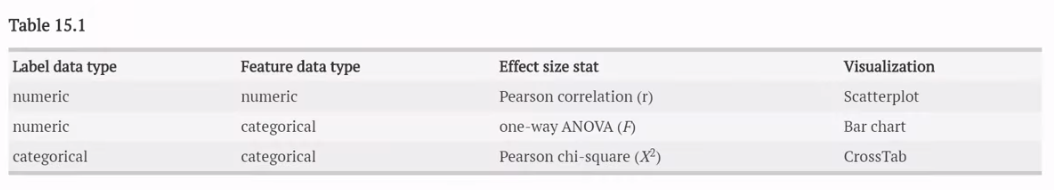
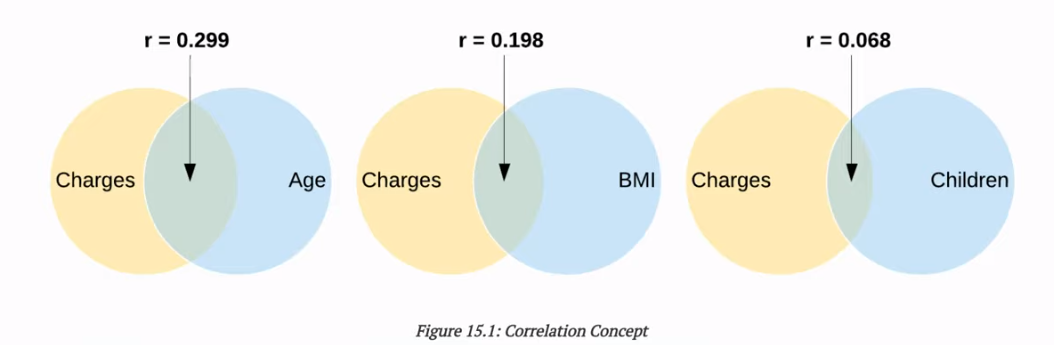
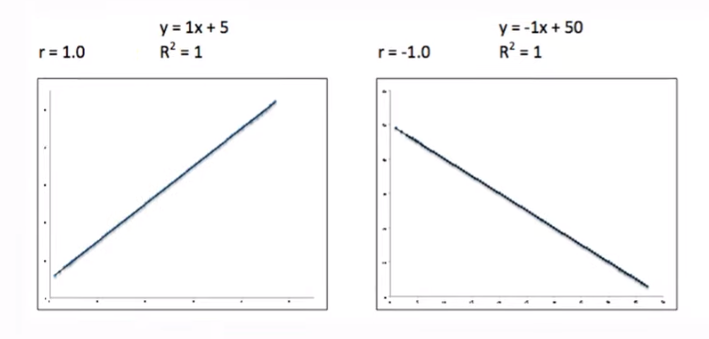
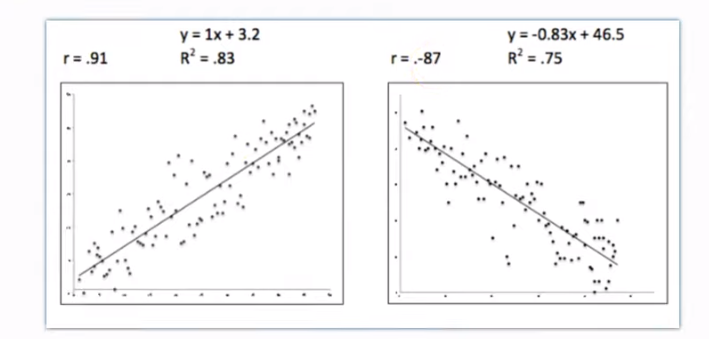
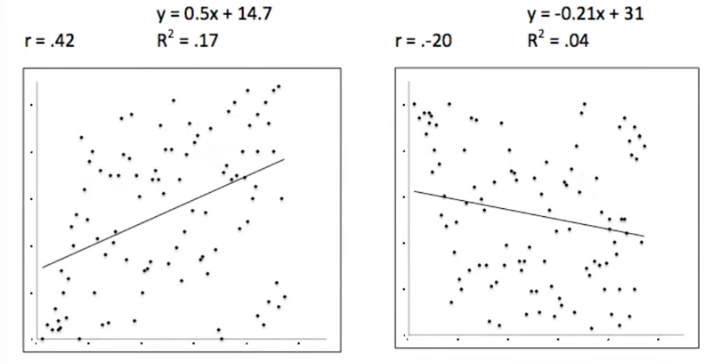

#### Small effect size: .10 < r < .29
#### Medium effect size: .30 < r < .49
#### Large effect size: .50 < r

In [1]:
import numpy as np

height = [60, 62, 65, 68, 70, 74]
weight = [140, 138, 150, 166, 190, 250]

np.corrcoef(height, weight)

array([[1.        , 0.92989745],
       [0.92989745, 1.        ]])

In [2]:
np.corrcoef(height, weight)[0][1]

0.9298974521408027

In [2]:
import pandas as pd

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.corr()

/tmp/ipykernel_21975/3270625272.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [6]:
df.charges.corr(df.bmi)

0.1983409688336288

In [9]:
from scipy import stats

corr = stats.pearsonr(df.charges, df.age)
corr    ## corr와 pvalue pair로 반환

PearsonRResult(statistic=0.29900819333064765, pvalue=4.8866933317203816e-29)

In [13]:
r, p = stats.pearsonr(df.charges, df.age)

print(round(r, 4))
print(round(p, 29))

0.299
5.0000000000000004e-29


In [19]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in df:
    print(col)
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges': ## numeric data type 인 경우에만 계산되도
        r, p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

age
sex
bmi
children
smoker
region
charges


r      p
age       0.299  0.000
bmi       0.198  0.000
children  0.068  0.013

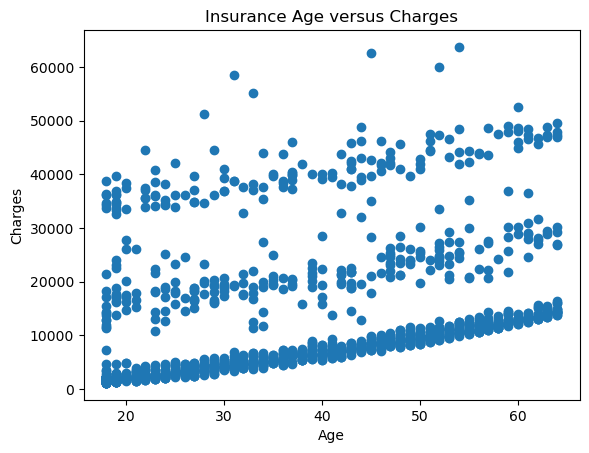

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show() ## 항상 마지막에

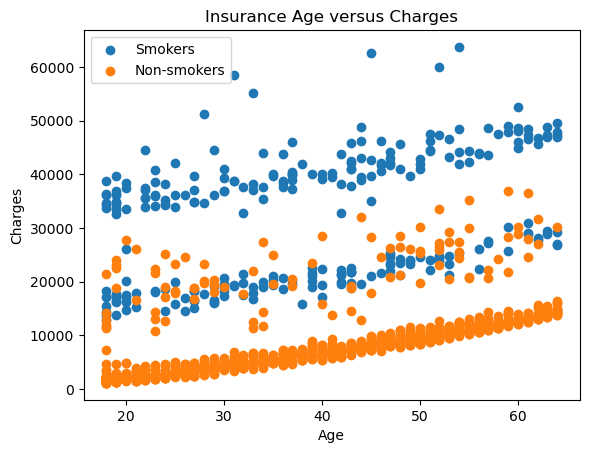

In [30]:
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

plt.scatter(df_smoker.age, df_smoker.charges, label='Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label='Non-smokers')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

plt.show() ## 항상 마지막에

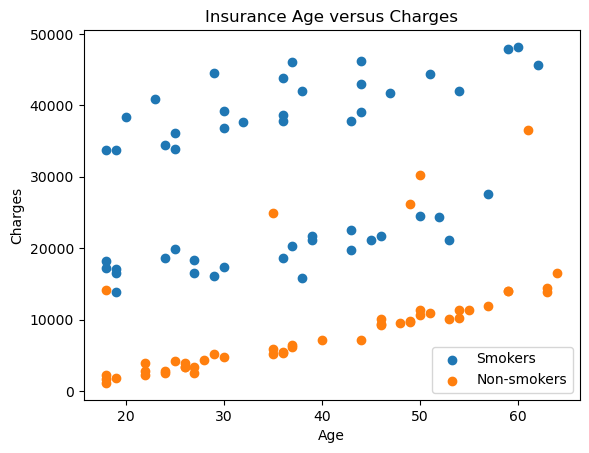

In [32]:
df_smoker_reduced = df_smoker.sample(50) ## 랜덤하게 50개 선택
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label='Smokers')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label='Non-smokers')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

plt.show() ## 항상 마지막에

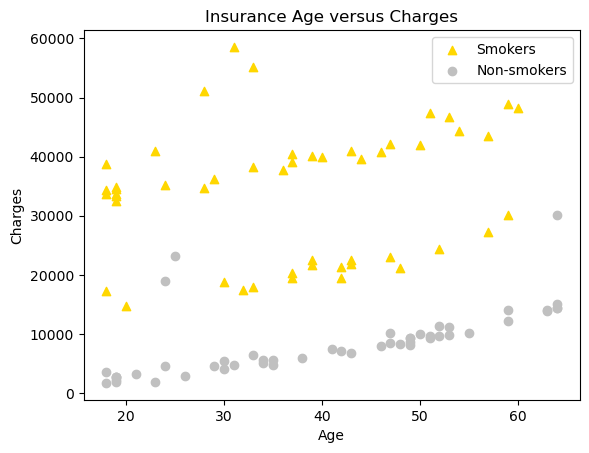

In [36]:
df_smoker_reduced = df_smoker.sample(50) ## 랜덤하게 50개 선택
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label='Smokers', color='gold', marker='^')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label='Non-smokers', color='silver', marker='o')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

plt.show() ## 항상 마지막에

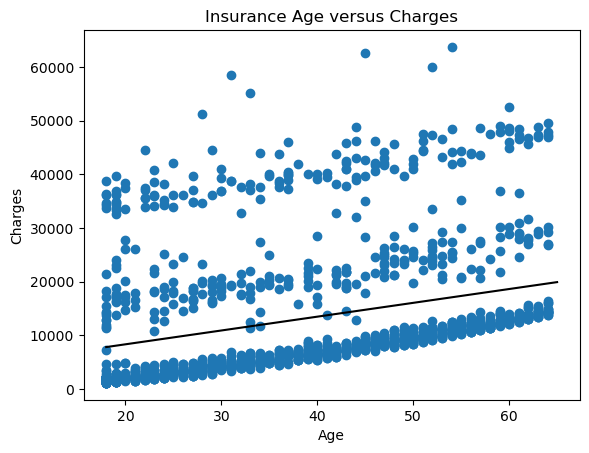

In [50]:
## y = mx + b
## y = slope(x) + intercept

m, b, r, p, err = stats.linregress(df.age, df.charges)

x = range(df.age.min(), df.age.max()+2)
y = m * x + b
plt.plot(x, y, color='black')
plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()

In [54]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.formula.api import ols

model = ols(formula='charges~age', data=df).fit()  ## y 축을 먼저 적어주는게 중요하다.

white_test = het_white(model.resid, model.model.exog)
breushpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breushpagan_test

output_df

LM stat      LM p    F stat  F stat p
White          0.002713  0.998645  0.001353  0.998648
Breusch-Pagan  0.000413  0.983776  0.000413  0.983792

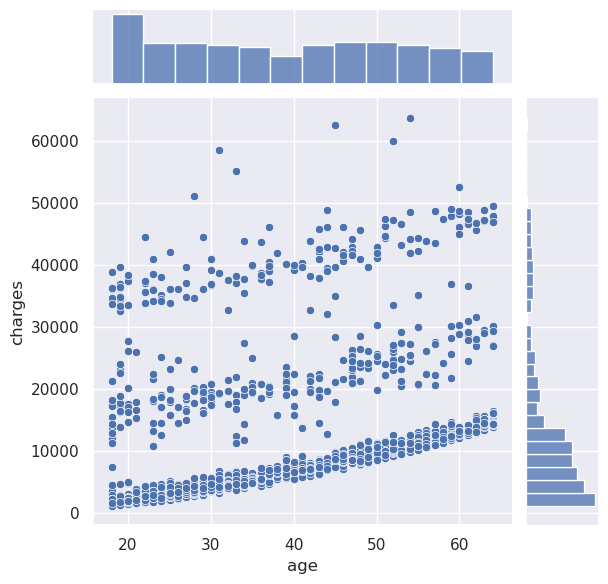

In [56]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x="age", y='charges', data=df)  ## histogram 까지 그려줌
plt.show()

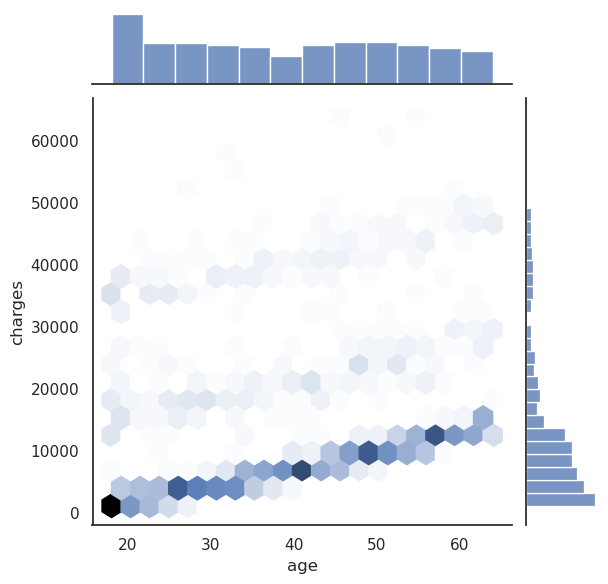

In [61]:
sns.set_style("white")
sns.jointplot(x="age", y='charges', data=df, kind='hex') ## hexagon 모양으로 각 dot들의 밀도를 표현해줌
plt.show()

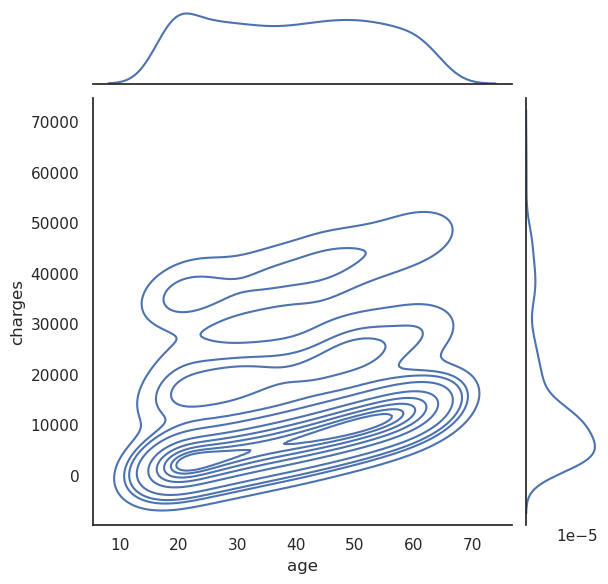

In [66]:
sns.jointplot(x="age", y="charges", data=df, kind='kde'); ## plt.show() -> ";", kde = 등고선형식으로 표현

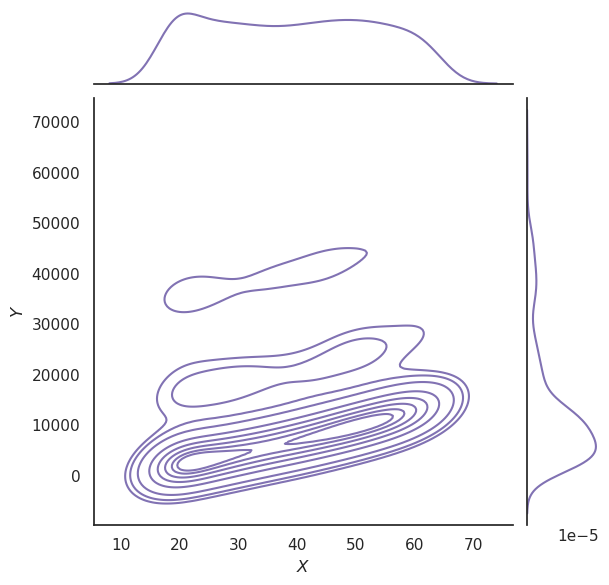

In [73]:
g = sns.jointplot(x='age', y='charges', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

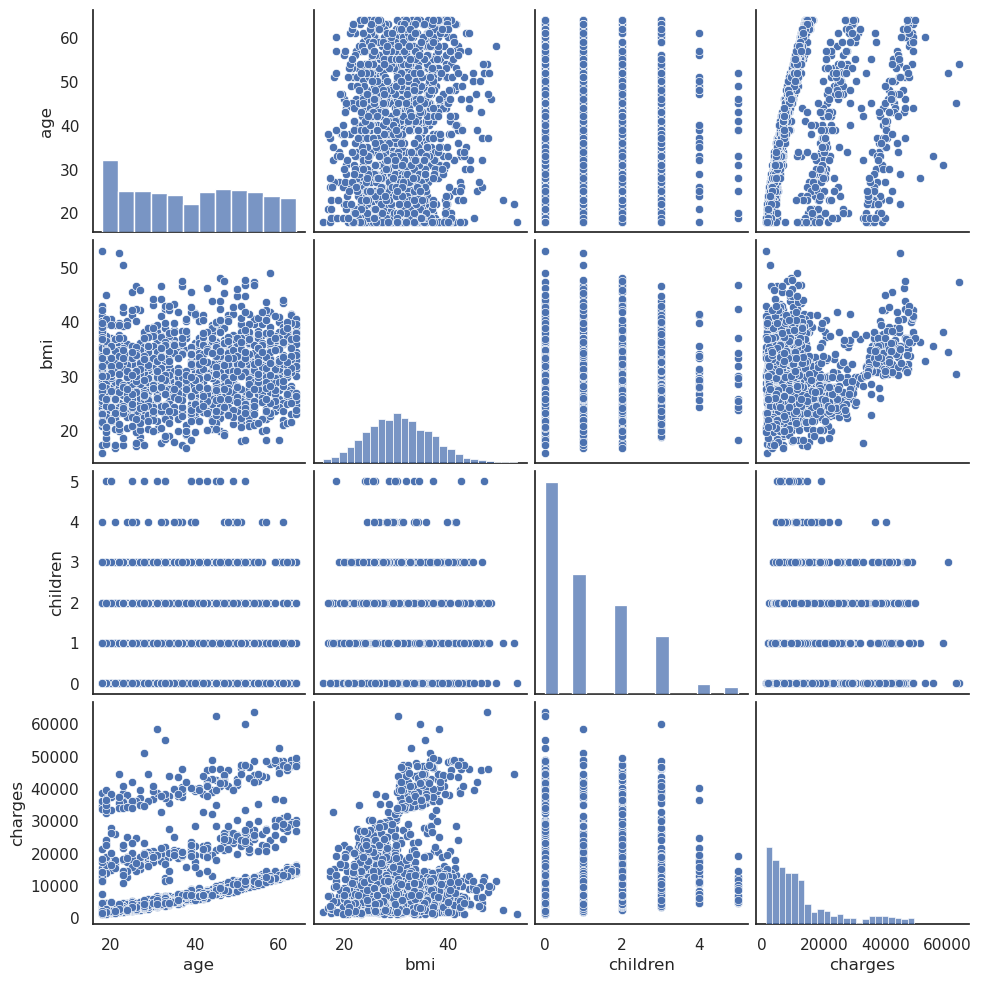

In [75]:
# df.dropna(inplace=True)
sns.pairplot(df);

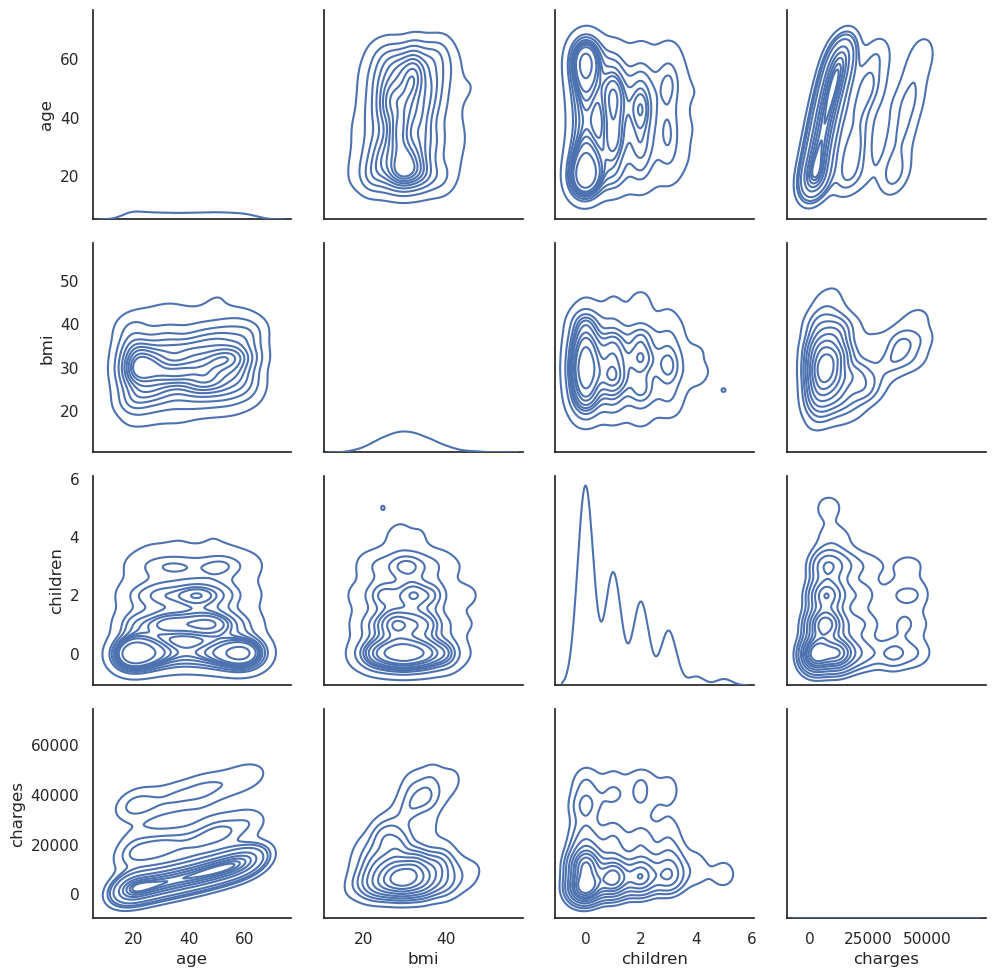

In [77]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=10);

In [92]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

font = {'size': 8}
plt.rc('font', **font)

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.age, df.bmi, df.charges)

plt.show()

<Figure size 640x480 with 0 Axes>

In [3]:
import plotly.express as px

# fig = px.scatter_3d(df, x='age', y='charges', z='bmi')
# fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color='smoker')
# fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color='smoker', symbol='sex')
fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color='smoker', symbol='sex', size='children')
# fig.update_traces(marker_size=5)
fig.show()